<a href="https://colab.research.google.com/github/damola936/AI-ML-LLM/blob/main/TimeSeries_BitPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting Introduction + BitPredict 💰💹

## Get Data

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2025-03-09 14:58:22--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2025-03-09 14:58:22 (8.59 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing time series data

In [ ]:
import pandas as pd

dataset = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                      parse_dates=["Date"]) # we will be using the closing price.
dataset.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.65499,124.30466,124.75166,122.56349
1,BTC,2013-10-02,125.45500,123.65499,125.75850,123.63383
2,BTC,2013-10-03,108.58483,125.45500,125.66566,83.32833
3,BTC,2013-10-04,118.67466,108.58483,118.67500,107.05816
4,BTC,2013-10-05,121.33866,118.67466,121.93633,118.00566


In [ ]:
dataset.set_index("Date")

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2787 entries, 0 to 2786
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Currency             2787 non-null   object        
 1   Date                 2787 non-null   datetime64[ns]
 2   Closing Price (USD)  2787 non-null   float64       
 3   24h Open (USD)       2787 non-null   float64       
 4   24h High (USD)       2787 non-null   float64       
 5   24h Low (USD)        2787 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 130.8+ KB


In [ ]:
len(dataset)

2787

🗝️ there is only 2787 samples, typically deep learning models typically like a lot of samples -> thousands, to millions. A smaller number of samples is something you will often run into with time series data problems.

🗝️ The **seasonality** of time series dataset is referred to as the number of samples per year. So for our bitcoin data, it has a seasonality of daily -> value of 365 because we collect one sample per day meaning we gat 365 samples per year.

In [ ]:
bitcoin_df = dataset[["Date", "Closing Price (USD)"]].set_index("Date")
bitcoin_df.head()

,Closing Price (USD)
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
bitcoin_df = bitcoin_df.rename(columns={"Closing Price (USD)" : "Price"})
bitcoin_df.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


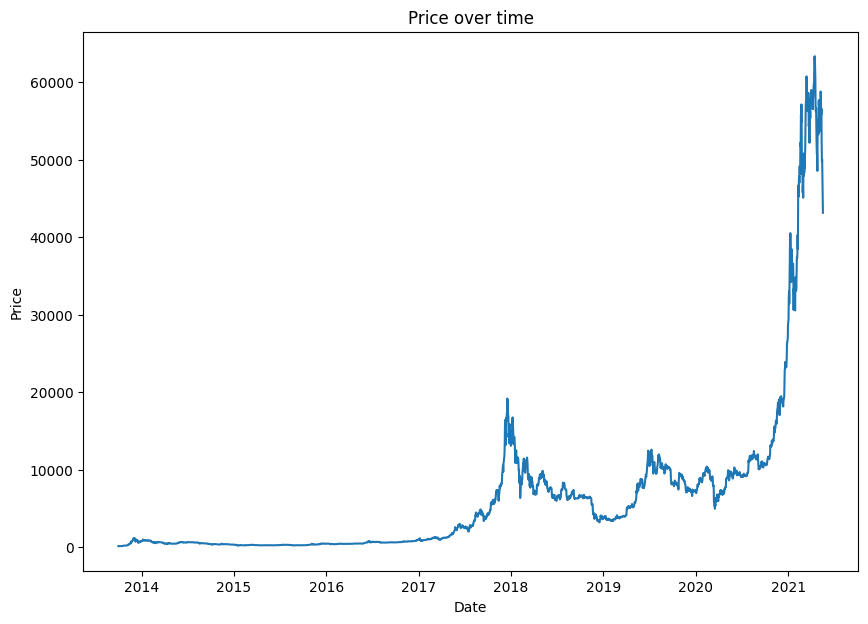

In [ ]:
# Plotting our dataset
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.lineplot(data=bitcoin_df, x="Date", y="Price")
plt.title("Price over time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

## Create train and test sets for time series

🗝️ for our test data we have to simulate the future

In [ ]:
split_size = int(0.8 * len(bitcoin_df))
split_size

2229

In [ ]:
# Create train dataset
bitcoin_df = bitcoin_df.reset_index()
train_df = bitcoin_df.head(split_size)
# Create test dataset
test_df = bitcoin_df.tail(len(bitcoin_df) - split_size)

len(train_df), len(test_df)

(2229, 558)

In [ ]:
test_df[:1]

,Date,Price
2229,2019-11-08,9226.485821


In [ ]:
train_df[-1:]

,Date,Price
2228,2019-11-07,9335.752402


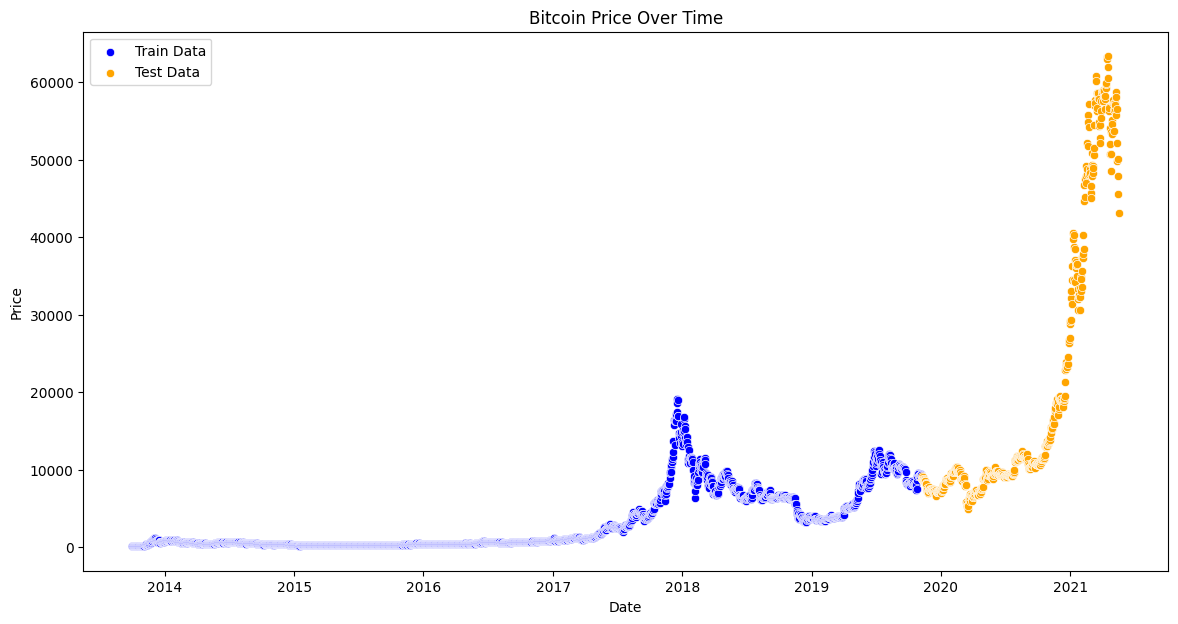

In [ ]:
X_train = train_df["Date"].to_numpy()
y_train = train_df["Price"].to_numpy()
X_test = test_df["Date"].to_numpy()
y_test = test_df["Price"].to_numpy()

plt.figure(figsize=(14, 7))

# Plot training data
sns.scatterplot(x=X_train, y=y_train, label='Train Data', color='blue')

# Plot test data
sns.scatterplot(x=X_test, y=y_test, label='Test Data', color='orange')

plt.title("Bitcoin Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

## Creating a Plottting Function

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_timeseries(dataset=None, timesteps=None,
                     values=None, x=None, y=None, start=0, end=None, label=None):
    """
    Plots a time series dataset

    Parameters
    -----------
    dataset : DataFrame, optional
        The dataset containing timesteps and values.
    timesteps : str, optional
        Column name for time variable in dataset.
    values : str, optional
        Column name for values corresponding to timesteps.
    x : array-like, optional
        Values to plot on x-axis (used if dataset is None).
    y : array-like, optional
        Values to plot on y-axis (used if dataset is None).
    start : int, optional
        Starting index for plotting.
    end : int, optional
        Ending index for plotting (None means plot till the end).
    label : str, optional
        Label for the plot.
    """
    plt.figure(figsize=(10, 7))

    # Plot from dataset
    if dataset is not None and timesteps and values:
        sns.lineplot(x=dataset[timesteps][start:end],
                     y=dataset[values][start:end],
                     label=label)

    # Plot from provided x and y
    if x is not None and y is not None:
        sns.lineplot(x=x[start:end],
                     y=y[start:end],
                     label=label)

    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)
    plt.show()


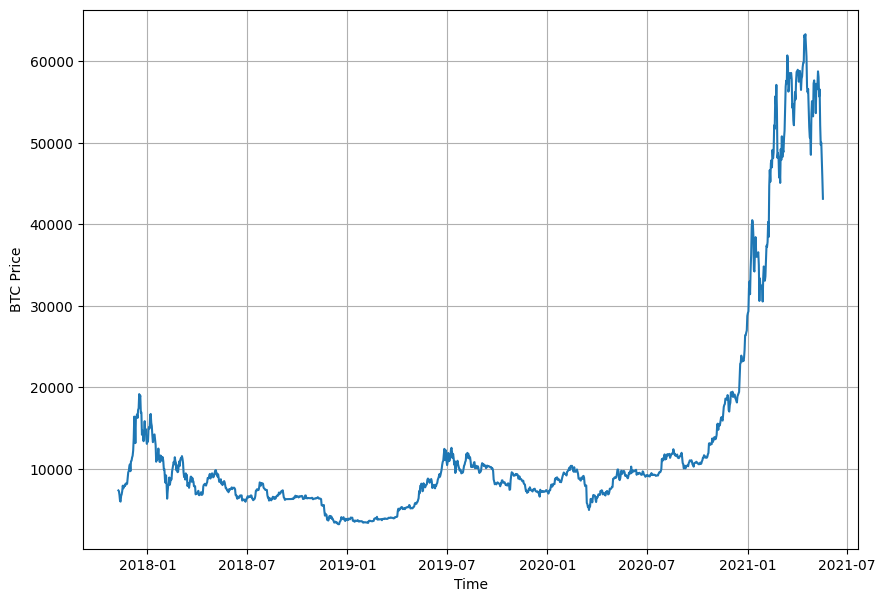

In [ ]:
# Test out Plotting function
plot_timeseries(
    dataset=bitcoin_df, timesteps="Date",
      values="Price", start=1500
)

# Modelling Experiments

Terms :
- **Horizon** = number of timesteps into the future we are going to predict
- **Window size** = number of timesteps we're going to use to predict **horizon**.

Experiments :
> - 0 Naive Model
> - 1 Dense Model, horizon = 1, window = 7
> - 2 Same as Model 1, horizon = 1, window = 30
> - 3 Same as Model 1 but with different horizon, horizon = 7, window = 30
> - 4 Conv1D
> - 5 LSTM
> - 6 Same as Model 1 but with multivariate data
> - 7 `N - Beats` Algorithm
> - 8 Ensemble (multiple models optimized on different loss functions)
> - 9 Future prediction model
> - 10 Same as 1 (with **turkey** data introduced)

## Model 0 : Naive Model Forecasting (Baseline)

$$\hat{y}_t = y_{t-1}$$

> The prediction at timestept (y_hat) is the same as the previous timestep

In [ ]:
# Create a naive forecast
naive_forecast = y_test[:-1] # Offset by 1

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [ ]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

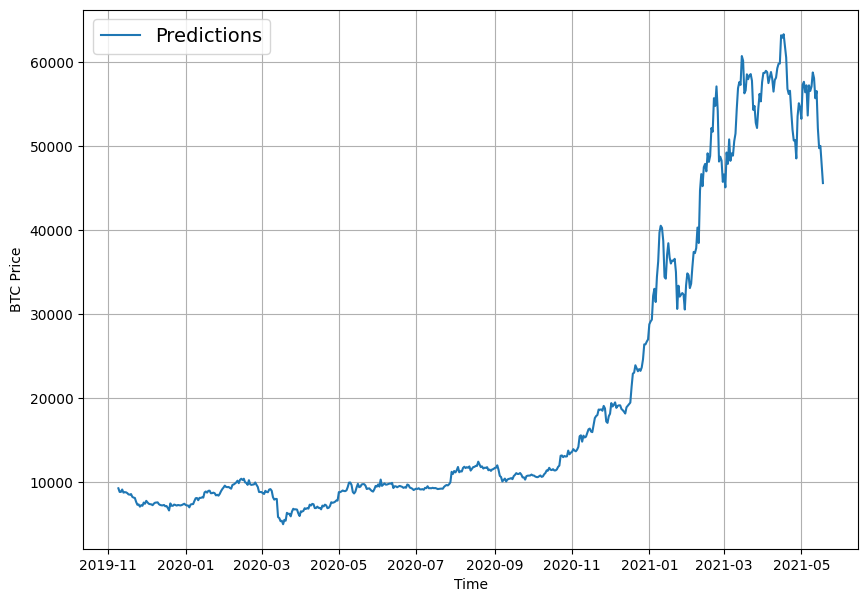

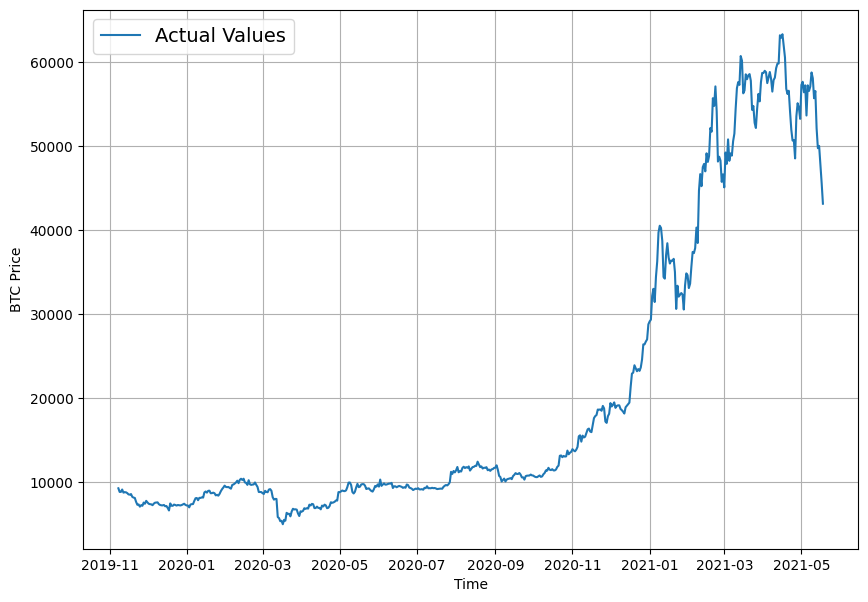

In [ ]:
# Plot naive forecast
# Test out Plotting function
plot_timeseries(dataset=None, timesteps=None,
                     values=None, x=X_test[1:], y=naive_forecast,  start=0, end=None, label="Predictions")
plot_timeseries(dataset=None, timesteps=None,
                     values=None, x=X_test, y=y_test,  start=0, end=None, label="Actual Values")

## Evaluating Model 0

> - MAE
> - MSE
> - RMSE
> - MAPE (Mean absolute percentage error)
> - MASE (Mean absolute scaled error)

In [ ]:
MODEL_METRICS = []

In [ ]:
import tensorflow as tf

# Mean absolute scaled error
def mean_absolute_scaled_error(y_true, y_pred):
    """Implementing MASE (assuming no seasonality)"""
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))

    # Find MAE of naive forecast
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day hence the shift of one
    return (mae / mae_naive_no_season).numpy()


In [ ]:
import tensorflow as tf

def evaluate_model(true, pred, name):
    """Calculates a series of metrics for a model"""
    true = tf.cast(true, dtype=tf.float32)
    pred = tf.cast(pred, dtype=tf.float32)
    mae = tf.keras.losses.MeanAbsoluteError()(true, pred).numpy()
    mse = tf.keras.losses.MeanSquaredError()(true, pred).numpy()
    rmse = tf.sqrt(mse).numpy()
    mape = tf.keras.losses.MeanAbsolutePercentageError()(true, pred).numpy()
    mase = mean_absolute_scaled_error(y_true=true, y_pred=pred)  # Assuming this function is defined elsewhere

    # Account for predictions with multiple dimensions
    if mae.ndim > 0:
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)
        mase = tf.reduce_mean(mase)

    metric_dict = {
        "model": name,
        "mae": mae,
        "mse": mse,
        "rmse": rmse,
        "mape": mape,
        "mase": mase
    }

    MODEL_METRICS.append(metric_dict)

In [ ]:
evaluate_model(true=y_test[1:], pred=naive_forecast, name="model_0(Naive Forecast)")

In [ ]:
MODEL_METRICS

[{'model': 'model_0(Naive Forecast)',
  'mae': 567.9802,
  'mse': 1147547.0,
  'rmse': 1071.2362,
  'mape': 2.516525,
  'mase': 0.99957}]

## Formatting Data: Windowing our dataset

We window our time series dataset to turn our problem into a supervised learning problem.

This could be donw with for loops but for large time series, that'd be quite slow. We can leverage Numpy array indexing for the problem

In [ ]:
len(bitcoin_df)

2787

In [ ]:
len(bitcoin_df) / 7

398.14285714285717

In [ ]:
# Setting up global variables for window and horizon size
HORIZON = 1
WINDOW = 7

In [ ]:
def get_labelled_window(x, horizon=HORIZON):
    return x[:, :-horizon], x[:, -horizon:]

In [ ]:
import numpy as np

def make_windows(x, window_size=WINDOW, horizon=HORIZON):
    """
        Turns a 1D array into a 2D array of sequential labelled windows of
        window_size with horizon size labels.
    """
    window_step = np.expand_dims(np.arange(window_size+horizon), axis=0) # axis at 0=expand by row, axis at 1=expand by column
    window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T
    # Index on the target array (a time series) with 2D array of multiple window steps
    windowed_array = x[window_indexes]
    windows, labels = get_labelled_window(windowed_array, horizon=horizon)
    return windows, labels


In [ ]:
full_windows, full_labels = make_windows(bitcoin_df["Price"].to_numpy())
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# View the first 3 windows/labels
for i in range(3):
    print(f"Window: {full_windows[i]} -> Label/Horizon {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label/Horizon [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label/Horizon [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label/Horizon [125.96116]


In [ ]:
# View the last 3 windows/labels
for i in range(3):
    print(f"Window: {full_windows[i-3]} -> Label/Horizon {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label/Horizon [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label/Horizon [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label/Horizon [43144.47129086]


🗝️ Note: There is a function in tensorflow which does similar to the above: in tf.keras.preprocessing, an extension could be to try and replicate what we have done using the premade function
 `tf.keras.preprocessing.timeseries_dataset_from_array`

## Turning windowed dataset into training and test sets

In [ ]:
full_windows[:5], full_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
def make_train_test_splits(windows, labels, test_split=0.2):
    """
        Split matching pairs of windows and labels into train and test splits.
    """
    split_size = int(len(windows) * (1 - test_split))  # 80% train 20% test
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]

    return train_windows, test_windows, train_labels, test_labels

In [ ]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

## Creating a Model checkpoint callback to compare each model's best perfomances

📔 if our model's best performance was at epoch 55 and we are training for 100 epochs. we want to load and evaluate the model saved at epoch 55 and so on..

In [ ]:
import os

def create_model_checkpoint(model_name, save_path="model_experiments"):
    """
        Saves best perfoming model epoch to a directory
    """
    return tf.keras.callbacks.ModelCheckpoint(
        os.path.join(save_path, model_name),
        verbose=0,
        save_best_only=True
    )

## Model 1 : Dense Model with ***window=7,*** ***horizon=1***

- 128 batch size
- No activation function in outer layer
- Adam Optimizer and MAE loss function
- for 100 epochs

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for reproducibility
tf.random.set_seed(42)

# Construct Model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_1_dense")

model_1.compile(loss="mae", optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

history_1 = model_1.fit(x=train_windows, y=train_labels,
                        epochs=100, verbose=1, batch_size=128,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name="model_1.keras")])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 2238.7773 - mae: 2238.7773 - mse: 13961544.0000 - val_loss: 3040.1489 - val_mae: 3040.1489 - val_mse: 21247544.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 435.5291 - mae: 435.5291 - mse: 620354.6875 - val_loss: 1493.7246 - val_mae: 1493.7246 - val_mse: 5639516.0000
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 212.2177 - mae: 212.2177 - mse: 208791.8125 - val_loss: 1157.4800 - val_mae: 1157.4800 - val_mse: 3850706.0000
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 183.7768 - mae: 183.7768 - mse: 166290.0938 - val_loss: 1004.8336 - val_mae: 1004.8336 - val_mse: 3217137.5000
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 170.8795 - mae: 170.8795 - mse: 147825.2344 - val_loss: 961.5428 - val_mae: 961.5428 - val_mse: 2984680.0000
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 164.1150 - mae: 164.1150 - mse: 140058.8125 - val_loss: 952.0682 - val_mae: 952.0682 - 

In [ ]:
model_1.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 282.1894 - mae: 282.1894 - mse: 343578.0625


[566.6591186523438, 566.6591186523438, 1151669.375]

In [ ]:
# Load in best performing epoch for model 1
model_1_best = tf.keras.models.load_model("/content/model_experiments/model_1.keras")
model_1_best.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 280.6861 - mae: 280.6861 - mse: 340791.1562


[562.38623046875, 562.38623046875, 1145615.5]

In [ ]:
def predict_evaluate_model(model, name):
    """
        Make predictions with a model and evaluate those predictions.

        Args:
            model: The TensorFlow model to use for predictions.
            name: The name of the model (used for labeling in evaluation).
        """

    model_pred = tf.squeeze(model.predict(test_windows))
    evaluate_model(true=tf.squeeze(test_labels), pred=model_pred, name=name)

In [ ]:
predict_evaluate_model(model=model_1, name=model_1.name)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [ ]:
MODEL_METRICS

[{'model': 'model_0(Naive Forecast)',
  'mae': 567.9802,
  'mse': 1147547.0,
  'rmse': 1071.2362,
  'mape': 2.516525,
  'mase': 0.99957},
 {'model': 'model_1_dense',
  'mae': 566.6591,
  'mse': 1151669.2,
  'rmse': 1073.1586,
  'mape': 2.533148,
  'mase': 0.99546313}]

## Model 2: Dense(Window = 30, horizon=1)

In [ ]:
HORIZON = 1 # Predict one step at a time
WINDOW = 30 # Use 30 timesteps in past

In [ ]:
# Make windowed data with new horizon and window sizes
full_windows, full_labels = make_windows(bitcoin_df["Price"].to_numpy(), window_size=WINDOW, horizon=HORIZON)

In [ ]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [ ]:
# Creating Model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_2_dense")

model_2.compile(loss="mae", optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

history_2 = model_2.fit(x=train_windows, y=train_labels,
                        epochs=100, verbose=1, batch_size=128,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name="model_2.keras")])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 1332.7255 - mae: 1332.7255 - mse: 6325951.0000 - val_loss: 2390.4778 - val_mae: 2390.4778 - val_mse: 13591033.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 344.2835 - mae: 344.2835 - mse: 516625.6562 - val_loss: 1304.2985 - val_mae: 1304.2985 - val_mse: 5466127.0000
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 237.1798 - mae: 237.1798 - mse: 277964.6875 - val_loss: 1238.5377 - val_mae: 1238.5377 - val_mse: 4839969.0000
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 204.8607 - mae: 204.8607 - mse: 210113.0312 - val_loss: 1151.2687 - val_mae: 1151.2687 - val_mse: 4566390.5000
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 196.9867 - mae: 196.9867 - mse: 184954.1094 - val_loss: 1084.1110 - val_mae: 1084.1110 - val_mse: 3886745.0000
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 178.2774 - mae: 178.2774 - mse: 156484.5781 - val_loss: 1028.6053 - val_mae: 1028.6

In [ ]:
model_2.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 378.7469 - mae: 378.7469 - mse: 449583.9062


[706.82080078125, 706.82080078125, 1529862.875]

In [ ]:
# Load in best performing epoch for model 1
model_2_best = tf.keras.models.load_model("/content/model_experiments/model_2.keras")
model_2_best.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 299.7776 - mae: 299.7776 - mse: 364611.2188


[592.037841796875, 592.037841796875, 1214589.5]

In [ ]:
predict_evaluate_model(model=model_2_best, name=model_2.name)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [ ]:
MODEL_METRICS

[{'model': 'model_0(Naive Forecast)',
  'mae': 567.9802,
  'mse': 1147547.0,
  'rmse': 1071.2362,
  'mape': 2.516525,
  'mase': 0.99957},
 {'model': 'model_1_dense',
  'mae': 566.6591,
  'mse': 1151669.2,
  'rmse': 1073.1586,
  'mape': 2.533148,
  'mase': 0.99546313},
 {'model': 'model_2_dense',
  'mae': 592.0379,
  'mse': 1214589.5,
  'rmse': 1102.0841,
  'mape': 2.6685233,
  'mase': 1.034888}]

## Model 3: Dense(Window=30, horizon=7)

In [ ]:
HORIZON = 7
WINDOW = 30

In [ ]:
# Make windowed data with new horizon and window sizes
full_windows, full_labels = make_windows(bitcoin_df["Price"].to_numpy(), window_size=WINDOW, horizon=HORIZON)

In [ ]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [ ]:
# Creating Model
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_3_dense")

model_3.compile(loss="mae", optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

history_3 = model_3.fit(x=train_windows, y=train_labels,
                        epochs=100, verbose=1, batch_size=128,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name="model_3.keras")])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 2629.5898 - mae: 2629.5898 - mse: 27474912.0000 - val_loss: 3035.9553 - val_mae: 3035.9553 - val_mse: 22983934.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 627.9391 - mae: 627.9391 - mse: 1752710.7500 - val_loss: 2823.5964 - val_mae: 2823.5964 - val_mse: 21974140.0000
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 453.4152 - mae: 453.4152 - mse: 1090700.2500 - val_loss: 2093.4792 - val_mae: 2093.4792 - val_mse: 12887461.0000
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 402.9109 - mae: 402.9109 - mse: 887244.5000 - val_loss: 1909.8372 - val_mae: 1909.8372 - val_mse: 11038653.0000
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 374.6447 - mae: 374.6447 - mse: 765060.7500 - val_loss: 1823.1503 - val_mae: 1823.1503 - val_mse: 10248298.0000
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 353.8250 - mae: 353.8250 - mse: 672478.1250 - val_loss: 1760.6182 - val_mae: 17

In [ ]:
model_3.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 643.1417 - mae: 643.1417 - mse: 1646177.0000


[1278.4742431640625, 1278.4742431640625, 5592684.0]

In [ ]:
# Load in best performing epoch for model 1
model_3_best = tf.keras.models.load_model("/content/model_experiments/model_3.keras")
model_3_best.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 644.5044 - mae: 644.5044 - mse: 1634548.6250


[1270.5260009765625, 1270.5260009765625, 5559028.5]

In [ ]:
predict_evaluate_model(model=model_3_best, name=model_3.name)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [ ]:
MODEL_METRICS

[{'model': 'model_0(Naive Forecast)',
  'mae': 567.9802,
  'mse': 1147547.0,
  'rmse': 1071.2362,
  'mape': 2.516525,
  'mase': 0.99957},
 {'model': 'model_1_dense',
  'mae': 566.6591,
  'mse': 1151669.2,
  'rmse': 1073.1586,
  'mape': 2.533148,
  'mase': 0.99546313},
 {'model': 'model_2_dense',
  'mae': 592.0379,
  'mse': 1214589.5,
  'rmse': 1102.0841,
  'mape': 2.6685233,
  'mase': 1.034888},
 {'model': 'model_3_dense',
  'mae': 1270.5259,
  'mse': 5559028.5,
  'rmse': 2357.7593,
  'mape': 5.7473035,
  'mase': 2.2608294}]

## Comparing Models

In [ ]:
compare_df = pd.DataFrame(MODEL_METRICS)
compare_df.head()

,model,mae,mse,rmse,mape,mase
0,model_0(Naive Forecast),567.980225,1147547.00,1071.236206,2.516525,0.999570
1,model_1_dense,566.659119,1151669.25,1073.158569,2.533148,0.995463
2,model_2_dense,592.037903,1214589.50,1102.084106,2.668523,1.034888
3,model_3_dense,1270.525879,5559028.50,2357.759277,5.747303,2.260829


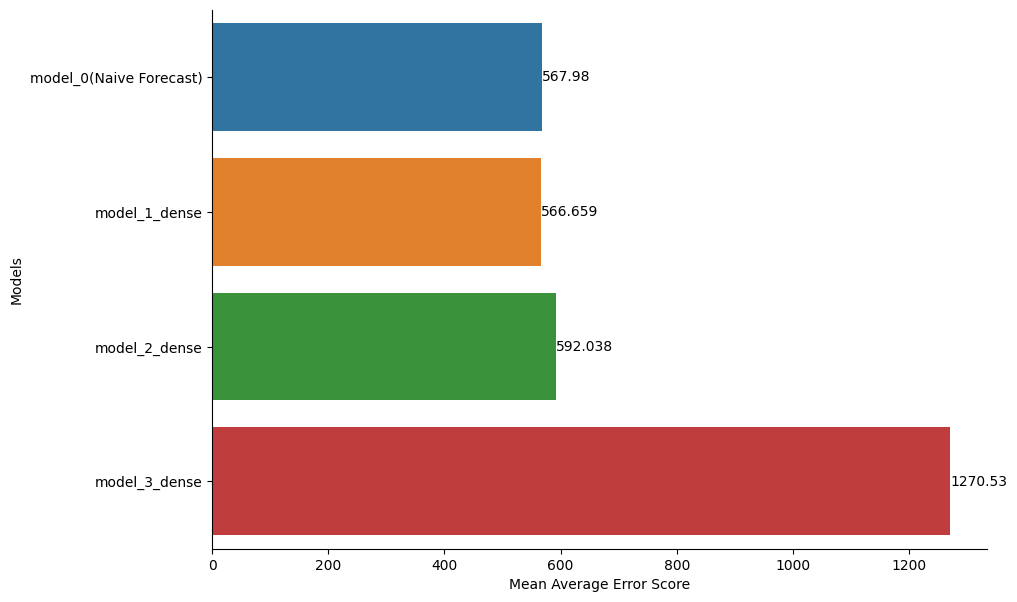

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 7))
ax = sns.barplot(data=compare_df, x="mae", y="model", hue="model")
plt.xlabel("Mean Average Error Score")
plt.ylabel("Models")

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.gca().spines[["top", "right"]].set_visible(False)
plt.show()

## Plotting AutoCorrelation

In [ ]:
bitcoin_df.head()

,Date,Price
0,2013-10-01,123.65499
1,2013-10-02,125.45500
2,2013-10-03,108.58483
3,2013-10-04,118.67466
4,2013-10-05,121.33866


<Figure size 1000x700 with 0 Axes>

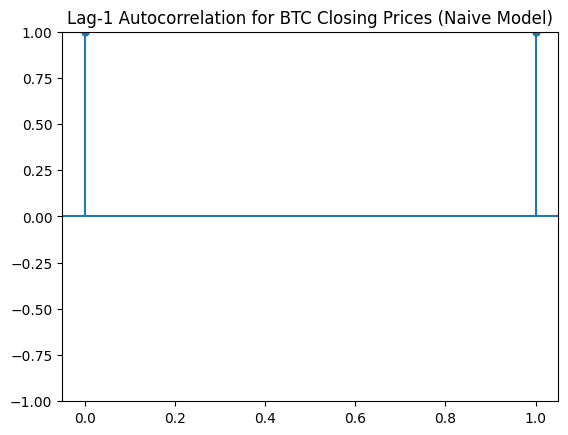

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot the ACF for the closing price
plt.figure(figsize=(10, 7))
plot_acf(bitcoin_df["Price"], lags=1)  # Adjust lags as needed
plt.title("Lag-1 Autocorrelation for BTC Closing Prices (Naive Model)")
plt.show()

## Model 4: Conv1D

## Messy model, lambda layer is bugged. IDK wtf this sht is so annoying

In [ ]:
HORIZON = 1
WINDOW = 7

In [ ]:
# Make windowed data with new horizon and window sizes
full_windows, full_labels = make_windows(bitcoin_df["Price"].to_numpy(), window_size=WINDOW, horizon=HORIZON)

In [ ]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

To use the Conv1D Layer we need an input shape of this : `(batch_size, timesteps, input_dim)`

In [ ]:
# Check data inout shape
train_windows[0].shape, train_labels[0].shape

((7,), (1,))

We need to add an extra dimension to our inputs so it becomes `(7, 1)` from `(7,)`.
> We will do this using a lambda layer

In [ ]:
train_windows_expanded = [tf.expand_dims(x, axis=1) for x in train_windows]
train_labels_expanded = [tf.expand_dims(x, axis=1) for x in train_labels]
test_windows_expanded = [tf.expand_dims(x, axis=1) for x in test_windows]
test_labels_expanded = [tf.expand_dims(x, axis=1) for x in test_labels] # All return list of tensors

train_windows_expanded = tf.constant(np.array(train_windows_expanded)) # turn to  umpy array so they are all singular tensors
train_labels_expanded = tf.constant(np.array(train_labels_expanded))
test_windows_expanded = tf.constant(np.array(test_windows_expanded))
test_labels_expanded = tf.constant(np.array(test_labels_expanded))

In [ ]:
assert len(train_windows_expanded) == len(train_labels_expanded)

In [ ]:
# Creating Model

model_4 = tf.keras.Sequential([
    layers.Conv1D(filters=128, kernel_size=WINDOW, padding="causal", activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_4_conv1D")

model_4.compile(loss="mae", optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

history_4 = model_4.fit(x=train_windows_expanded, y=train_labels_expanded,
                        epochs=100, verbose=1, batch_size=128,
                        validation_data=(test_windows_expanded, test_labels_expanded),
                        callbacks=[create_model_checkpoint(model_name="model_4.keras")])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - loss: 2442.3464 - mae: 2442.3464 - mse: 14982151.0000 - val_loss: 6912.4297 - val_mae: 6912.4297 - val_mse: 133339608.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1035.6736 - mae: 1035.6736 - mse: 3954514.0000 - val_loss: 5227.8496 - val_mae: 5227.8496 - val_mse: 81462880.0000
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 740.1923 - mae: 740.1923 - mse: 2503868.7500 - val_loss: 3588.2444 - val_mae: 3588.2446 - val_mse: 51501644.0000
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 544.0287 - mae: 544.0287 - mse: 1599053.1250 - val_loss: 2848.1362 - val_mae: 2848.1360 - val_mse: 34516796.0000
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 435.9268 - mae: 435.9268 - mse: 1095995.2500 - val_loss: 2315.6755 - val_mae: 2315.6753 - val_mse: 23348524.0000
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 362.2286 - mae: 362.2286 - mse: 769275.3750 - val_loss: 1971.7465 - val_ma

In [ ]:
model_4.evaluate(test_windows_expanded, test_labels_expanded)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 595.7238 - mae: 595.7238 - mse: 1477584.3750


[1216.28564453125, 1216.2855224609375, 5088660.5]

In [ ]:
# Load in best performing epoch for model 1
model_4_best = tf.keras.models.load_model("/content/model_experiments/model_4.keras", safe_mode=False)
model_4_best.evaluate(test_windows_expanded, test_labels_expanded)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 593.1152 - mae: 593.1152 - mse: 1466941.8750


[1208.02001953125, 1208.02001953125, 5068225.0]

In [ ]:
preds_4 = model_4_best.predict(test_windows_expanded)
evaluate_model(true=tf.squeeze(test_labels_expanded), pred=preds_4, name=model_4.name)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [ ]:
MODEL_METRICS

[{'model': 'model_0(Naive Forecast)',
  'mae': 567.9802,
  'mse': 1147547.0,
  'rmse': 1071.2362,
  'mape': 2.516525,
  'mase': 0.99957},
 {'model': 'model_1_dense',
  'mae': 567.2693,
  'mse': 1159824.8,
  'rmse': 1076.9517,
  'mape': 2.5629241,
  'mase': 0.996535},
 {'model': 'model_2_dense',
  'mae': 584.10913,
  'mse': 1183233.0,
  'rmse': 1087.7651,
  'mape': 2.6427193,
  'mase': 1.0210285},
 {'model': 'model_3_dense',
  'mae': 1256.477,
  'mse': 5426018.5,
  'rmse': 2329.3816,
  'mape': 5.7242737,
  'mase': 2.2358305},
 {'model': 'model_4_conv1D',
  'mae': 17028.127,
  'mse': 610039000.0,
  'rmse': 24698.967,
  'mape': 111.65411,
  'mase': 29.913702}]

In [ ]:
# predict_evaluate_model(model_4_best, name="model_4", new_window=test_windows_expanded) DOES NOT WORK, LAMBDA LAYER ANNOYING AND BUGGED OUT ESPECIALLY WHEN LOADING MODELS, TRIED TO RESHAPE BEFORE PASSAGE, STILL BUGS

In [ ]:
preds_4[:10]

array([[[9293.755 ],
        [9218.105 ],
        [9358.435 ],
        [9329.222 ],
        [9316.107 ],
        [9238.157 ],
        [8886.917 ]],

       [[9205.261 ],
        [9377.765 ],
        [9326.928 ],
        [9339.877 ],
        [9220.162 ],
        [8830.571 ],
        [8859.368 ]],

       [[9372.498 ],
        [9340.118 ],
        [9331.188 ],
        [9237.44  ],
        [8819.351 ],
        [8817.101 ],
        [9098.069 ]],

       [[9329.464 ],
        [9346.819 ],
        [9228.06  ],
        [8828.823 ],
        [8801.157 ],
        [9072.624 ],
        [8776.36  ]],

       [[9338.616 ],
        [9243.255 ],
        [8819.378 ],
        [8813.877 ],
        [9057.299 ],
        [8730.337 ],
        [8797.091 ]],

       [[9229.335 ],
        [8827.028 ],
        [8792.625 ],
        [9068.55  ],
        [8721.362 ],
        [8770.3545],
        [8792.472 ]],

       [[8797.144 ],
        [8808.78  ],
        [9067.038 ],
        [8731.351 ],
        [8745.848 ],
 

In [ ]:
MODEL_METRICS

[{'model': 'model_0(Naive Forecast)',
  'mae': 567.9802,
  'mse': 1147547.0,
  'rmse': 1071.2362,
  'mape': 2.516525,
  'mase': 0.99957},
 {'model': 'model_1_dense',
  'mae': 567.2693,
  'mse': 1159824.8,
  'rmse': 1076.9517,
  'mape': 2.5629241,
  'mase': 0.996535},
 {'model': 'model_2_dense',
  'mae': 584.10913,
  'mse': 1183233.0,
  'rmse': 1087.7651,
  'mape': 2.6427193,
  'mase': 1.0210285},
 {'model': 'model_3_dense',
  'mae': 1256.477,
  'mse': 5426018.5,
  'rmse': 2329.3816,
  'mape': 5.7242737,
  'mase': 2.2358305},
 {'model': 'model_4_conv1D',
  'mae': 17028.127,
  'mse': 610039000.0,
  'rmse': 24698.967,
  'mape': 111.65411,
  'mase': 29.913702}]

## Model 5: Simple LSTM Cell Model

In [ ]:
HORIZON = 1
WINDOW = 7

model_5 = tf.keras.Sequential([
    layers.LSTM(128, return_sequences=True, activation="relu"),
    layers.LSTM(128, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_5_lstm")

model_5.compile(loss="mae", optimizer=tf.keras.optimizers.Adam(), metrics=["mae", "mse"])

history_5 = model_5.fit(x=train_windows_expanded, y=train_labels_expanded,
                        epochs=100,
                        batch_size=128,
                        validation_data=(test_windows_expanded, test_labels_expanded),
                        callbacks=[create_model_checkpoint(model_name="model_5.keras")])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 203ms/step - loss: 2899.0642 - mae: 2899.0642 - mse: 20980644.0000 - val_loss: 2277.4084 - val_mae: 2277.4084 - val_mse: 15109352.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 410.4231 - mae: 410.4231 - mse: 583969.2500 - val_loss: 1372.6010 - val_mae: 1372.6010 - val_mse: 5512172.5000
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 220.7311 - mae: 220.7311 - mse: 235993.0625 - val_loss: 1224.4954 - val_mae: 1224.4954 - val_mse: 4894081.5000
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 210.7268 - mae: 210.7268 - mse: 220997.6562 - val_loss: 1182.9237 - val_mae: 1182.9237 - val_mse: 4372036.0000
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 200.7093 - mae: 200.7093 - mse: 212889.2031 - val_loss: 1116.5681 - val_mae: 1116.5681 - val_mse: 4016245.0000
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 188.2475 - mae: 188.2475 - mse: 186890.1250 - val_loss: 1203.6469 - val_mae: 120

In [ ]:
# Load in best performing epoch for model 5
model_5_best = tf.keras.models.load_model("/content/model_experiments/model_5.keras", safe_mode=False)
model_5_best.evaluate(test_windows_expanded, test_labels_expanded)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 337.4268 - mae: 337.4268 - mse: 463696.4688


[675.9776000976562, 675.9776000976562, 1563292.625]

In [ ]:
preds_5 = model_5_best.predict(test_windows_expanded)
evaluate_model(true=tf.squeeze(test_labels_expanded), pred=preds_5, name=model_5.name)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


In [ ]:
MODEL_METRICS

[{'model': 'model_0(Naive Forecast)',
  'mae': 567.9802,
  'mse': 1147547.0,
  'rmse': 1071.2362,
  'mape': 2.516525,
  'mase': 0.99957},
 {'model': 'model_1_dense',
  'mae': 567.2693,
  'mse': 1159824.8,
  'rmse': 1076.9517,
  'mape': 2.5629241,
  'mase': 0.996535},
 {'model': 'model_2_dense',
  'mae': 584.10913,
  'mse': 1183233.0,
  'rmse': 1087.7651,
  'mape': 2.6427193,
  'mase': 1.0210285},
 {'model': 'model_3_dense',
  'mae': 1256.477,
  'mse': 5426018.5,
  'rmse': 2329.3816,
  'mape': 5.7242737,
  'mase': 2.2358305},
 {'model': 'model_4_conv1D',
  'mae': 17028.127,
  'mse': 610039000.0,
  'rmse': 24698.967,
  'mape': 111.65411,
  'mase': 29.913702},
 {'model': 'model_5_lstm',
  'mae': 675.9776,
  'mse': 1563292.8,
  'rmse': 1250.317,
  'mape': 3.0261416,
  'mase': 30.056292}]

## Model 6 : Using Multivariate time-series data

### Creating a Multivariate time sries dataset

Before we add a feature to our dataset. What Feature can we use?

> We can use bitcoing halving events

In [ ]:
bitcoin_df.head()


,Date,Price
0,2013-10-01,123.65499
1,2013-10-02,125.45500
2,2013-10-03,108.58483
3,2013-10-04,118.67466
4,2013-10-05,121.33866


In [ ]:
# Making a multivariate time-series (Adding the bitcoin halving events to our dataset)
block_reward_1 = 50 # 3 January 2009 - (for our dataset, october 2013. Since our dataset started at 2013)
block_reward_2 = 25 # 8th Novmber 2012
block_reward_3 = 12.5 # 9 july 2016
block_reward_4 = 6.25 # 18th May 2020

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [ ]:
block_reward_2_datetime

numpy.datetime64('2012-11-28')

In [ ]:
def filter_block_size(x):
    if block_reward_2_datetime <= x <= block_reward_3_datetime:
        return 25
    elif block_reward_3_datetime <= x <= block_reward_4_datetime:
        return 12.5
    else:
        return 6.25

bitcoin_df["block_reward"] = bitcoin_df["Date"].apply(filter_block_size)
bitcoin_df.head()

,Date,Price,block_reward
0,2013-10-01,123.65499,25.0
1,2013-10-02,125.45500,25.0
2,2013-10-03,108.58483,25.0
3,2013-10-04,118.67466,25.0
4,2013-10-05,121.33866,25.0


In [ ]:
bitcoin_df.tail()

,Date,Price,block_reward
2782,2021-05-14,49764.132082,6.25
2783,2021-05-15,50032.693137,6.25
2784,2021-05-16,47885.625255,6.25
2785,2021-05-17,45604.615754,6.25
2786,2021-05-18,43144.471291,6.25


In [ ]:
len(bitcoin_df)

2787

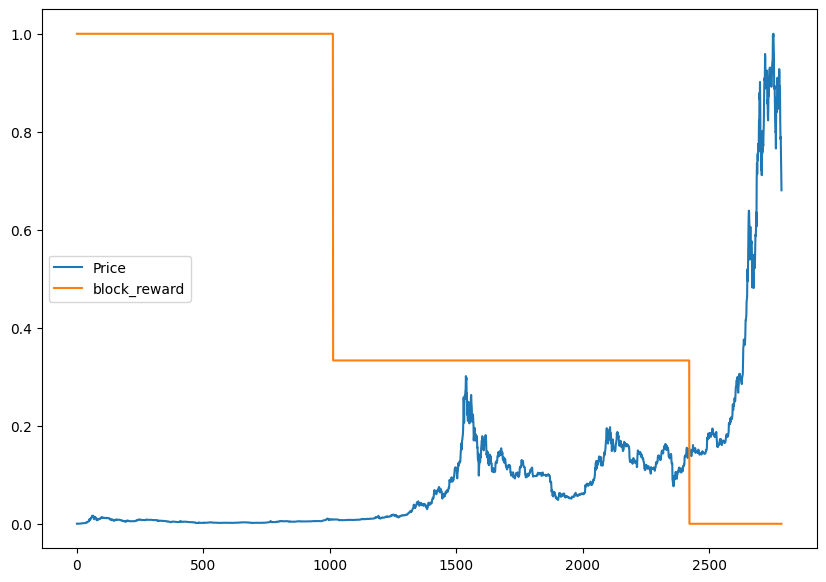

In [ ]:
# Plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_bitcoin_df = pd.DataFrame(minmax_scale(bitcoin_df[["Price", "block_reward"]]),
                                 columns=["Price", "block_reward"], index=bitcoin_df.index) # Change to only using the Price and block_reward columns
scaled_bitcoin_df.plot(figsize=(10, 7));

## Making a windowed for our multivariate dataset with pandas original functions were for  univariate data.

> We will use the `pandas.DataFrame.shift( )` method to window our multivariate data.

In [ ]:
# Set up dataset hyperparameters
HORIZON = 1
WINDOW = 7

In [ ]:
# Make a copy of the Data with the block reward
windowed_bitcoin_df = bitcoin_df.copy()

# Add windowed columns using the shift method
for i in range(WINDOW): # Shift values for each step in window
    windowed_bitcoin_df[f"Price+{i+1}"] = windowed_bitcoin_df["Price"].shift(periods=i+1)
windowed_bitcoin_df.head(10)

,Date,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
0,2013-10-01,123.65499,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-10-02,125.45500,25.0,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-10-03,108.58483,25.0,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
3,2013-10-04,118.67466,25.0,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
4,2013-10-05,121.33866,25.0,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
5,2013-10-06,120.65533,25.0,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
6,2013-10-07,121.79500,25.0,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
7,2013-10-08,123.03300,25.0,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
8,2013-10-09,124.04900,25.0,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
9,2013-10-10,125.96116,25.0,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483


In [ ]:
X = windowed_bitcoin_df.dropna().drop(["Price", "Date"], axis=1).astype(np.float32)
y = windowed_bitcoin_df.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
7,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
8,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
9,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
10,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
11,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
y.head()

,Price
7,123.032997
8,124.049004
9,125.961159
10,125.279663
11,125.927498


In [ ]:
# Make train and test sets using indexing
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
# Building Model

model_6 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_6_dense_multivariate")

model_6.compile(loss="mae", optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

history_6 = model_6.fit(x=X_train, y=y_train,
                        epochs=100,
                        batch_size=128,
                        validation_data=(X_test, y_test),
                        callbacks=[create_model_checkpoint(model_name="model_6.keras")])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 2515.3408 - mae: 2515.3408 - mse: 17162064.0000 - val_loss: 2788.3354 - val_mae: 2788.3354 - val_mse: 16843124.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 455.9742 - mae: 455.9742 - mse: 638948.6250 - val_loss: 1702.7317 - val_mae: 1702.7317 - val_mse: 6710938.0000
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 207.8246 - mae: 207.8246 - mse: 190402.2969 - val_loss: 1214.4906 - val_mae: 1214.4906 - val_mse: 3812597.7500
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 172.0184 - mae: 172.0184 - mse: 144635.3125 - val_loss: 926.6104 - val_mae: 926.6104 - val_mse: 2662304.7500
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 154.9493 - mae: 154.9493 - mse: 124781.0859 - val_loss: 867.9098 - val_mae: 867.9098 - val_mse: 2482119.7500
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 151.1050 - mae: 151.1050 - mse: 120290.5703 - val_loss: 859.1376 - val_mae: 859.1376 - va

In [ ]:
# Load in best performing epoch for model 6
model_6_best = tf.keras.models.load_model("/content/model_experiments/model_6.keras", safe_mode=False)
model_6_best.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 286.6864 - mae: 286.6864 - mse: 347471.2500


[572.6016235351562, 572.6016235351562, 1175185.5]

In [ ]:
preds_6 = model_6_best.predict(X_test)
evaluate_model(true=tf.squeeze(y_test), pred=preds_6, name=model_6.name)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [ ]:
MODEL_METRICS

[{'model': 'model_0(Naive Forecast)',
  'mae': 567.9802,
  'mse': 1147547.0,
  'rmse': 1071.2362,
  'mape': 2.516525,
  'mase': 0.99957},
 {'model': 'model_1_dense',
  'mae': 567.2693,
  'mse': 1159824.8,
  'rmse': 1076.9517,
  'mape': 2.5629241,
  'mase': 0.996535},
 {'model': 'model_2_dense',
  'mae': 584.10913,
  'mse': 1183233.0,
  'rmse': 1087.7651,
  'mape': 2.6427193,
  'mase': 1.0210285},
 {'model': 'model_3_dense',
  'mae': 1256.477,
  'mse': 5426018.5,
  'rmse': 2329.3816,
  'mape': 5.7242737,
  'mase': 2.2358305},
 {'model': 'model_4_conv1D',
  'mae': 17028.127,
  'mse': 610039000.0,
  'rmse': 24698.967,
  'mape': 111.65411,
  'mase': 29.913702},
 {'model': 'model_5_lstm',
  'mae': 675.9776,
  'mse': 1563292.8,
  'rmse': 1250.317,
  'mape': 3.0261416,
  'mase': 30.056292},
 {'model': 'model_6_dense_multivariate',
  'mae': 572.6017,
  'mse': 1175185.4,
  'rmse': 1084.0597,
  'mape': 2.5605311,
  'mase': 30.132936}]

##Model 7 : `N-BEATS Algorithm` (Neural Basis expansion analysis for interpretable  time series forecasting)

Model uses univariate data. so we will use univariate data. N-BEATS is a state of the art forecasting Model. We will be replicating the algorithm in the following paper,  Fig.1 : https://arxiv.org/pdf/1905.10437.pdf

- this will allow practicing replicating a paper with tensorflow code
- using tensorflow subclassing to make custom layers
- Get experience using the functional API to create cutom  architecture.
- Potentially get state of the art results on our problem

### Building and testing the N-BEATS block layer

The N-BEATS layer does not exist in tensorflow so we have to use tensorflow subclassing to make a custom layer for our model.

In [ ]:
# Create B-BEATS block custom layer
class NBeatsBlock(tf.keras.layers.Layer):
    def __init__(self,
                 input_size: int,
                 theta_size: int,
                 horizon: int,
                 n_neurons: int,
                 n_layers: int,
                **kwargs): # the **kwargs argument takes care of all the arguments for the parent class. Parent class has many arguments, some of those arguments cannot be written in as they arte too much so
        super().__init__(**kwargs)
        self.input_size = input_size
        self.theta_size = theta_size
        self.horizon = horizon
        self.n_neurons = n_neurons
        self.n_layers = n_layers

        # Block contains stack of 4 fully connected layers each has ReLU activation
        self.hidden = [tf.keras.layers.Dense(n_neurons,  activation="relu") for _ in range(n_layers)]
        # Output of block is a theta layer with linear activation
        self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

    def call(self, inputs):
        x = inputs
        for layer in self.hidden:
                x = layer(x)
        theta = self.theta_layer(x)
        # Output the backcast and the forecast from theta
        backcast, forecast = theta[:, :self.input_size],  theta[:,  -self.horizon:]
        return backcast,  forecast

In [ ]:
# Testing the N-BEATS block class
# Creating dummy inputs and outputs
# A wide neural network has lots of hidden units while a deep neural network has a lot of hidden layers
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(
    input_size=WINDOW,
    theta_size=WINDOW+HORIZON,
    horizon=HORIZON,
    n_neurons=128,
    n_layers=4,
)

# Create dummy inputs(haveto be same size as input size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW + 1), axis=0) # 0 row 1 col
dummy_inputs

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Pass dummy input into NBeatsBlock layer
dummy_backcast, dummy_forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are just the activation outputs of the theta layer (they'll be random due to no trainign of the model)
print(f"Backcast: {tf.squeeze(dummy_backcast.numpy())}")
print(f"Forecast: {tf.squeeze(dummy_forecast.numpy())}")

Backcast: [-0.04665307  0.12313117  0.08936106  0.37632713 -0.10782321  0.18864375
 -0.5956198 ]
Forecast: 0.2313324213027954


### Creating data for the N-BEATS algorithm using `t.data` for fast loading performant data pipelines.

In [ ]:
HORIZON = 1
WINDOW = 7

In [ ]:
# Create N-BEATS data inputs (N-BEATS works with univariate time series)
bitcoin_df.head()

,Date,Price,block_reward
0,2013-10-01,123.65499,25.0
1,2013-10-02,125.45500,25.0
2,2013-10-03,108.58483,25.0
3,2013-10-04,118.67466,25.0
4,2013-10-05,121.33866,25.0


In [ ]:
bitcoin_prices_nbeats = bitcoin_df.copy()
for i in range(WINDOW):
    bitcoin_prices_nbeats[f"Price{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)

bitcoin_prices_nbeats.head()

,Date,Price,block_reward,Price1,Price2,Price3,Price4,Price5,Price6,Price7
0,2013-10-01,123.65499,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-10-02,125.45500,25.0,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-10-03,108.58483,25.0,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
3,2013-10-04,118.67466,25.0,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
4,2013-10-05,121.33866,25.0,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop(["Price", "Date", "block_reward"], axis=1) # not using block reward univariate model
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [ ]:
# Time to make our datset performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset =  tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset =  tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

BATCH_SIZE = 1024

# Batch and prefetch
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for N-BEATS algorithm

In [ ]:
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30
INPUT_SIZE = WINDOW * HORIZON
THETA_SIZE = WINDOW + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for residual connections.

Before we can craft our N-BEATS model we need two layers for the residual connections -> (subtract and add)

We will use `tf.keras.layers.Add()` and `tf.keras.layers.Subtract()`

In [ ]:
# Testing Add and subtract Layer
# Make Tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

tensor_1, tensor_2

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>)

In [ ]:
# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

subtracted, added

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28], dtype=int32)>)

N-BEATS uses double residual stacking for its deep model training. To help alienate the ***vanishing gradient problem.***

info:  https://paperswithcode.com/method/resnet

### Building, compiling and fitting the N-BEATS algorithm

1. Setup an instance of N-BEATS block layer usingg `NBeatsBlock` class (this will be the initial block used for the network, the rest will be created as part of stacks)
2. Create an input layer for the N-BEATS stack using the functional API
3. Make the initial backcast and forecast for the model
4. Use for loop to create stacks of block layer
5. Use the `NBeatsBlock` class within the for loop in (4) to create blocks which return backcasts and block-level forecasts
6. Create double residual stacking using subtract and add layers
7. Put the model inputs and outputs together usign the `tf.keras.Model()`
8. Compile the model with MAE loss (the paper uses multiple losses, but we'll use MAE to keep it in line with previous models and Adam optimizer)
9. Fit the N-BEATS model for 5000 epochs. Use callbacks: ***Early Stopping*** , ***Reduce LR on Plateau***,

In [ ]:
import time

start_time = time.time()

# Building the N-Beats Model
tf.random.set_seed(42)
nbeats_block_layer = NBeatsBlock(
    input_size=INPUT_SIZE,
    theta_size=THETA_SIZE,
    horizon=HORIZON,
    n_neurons=N_NEURONS,
    n_layers=N_LAYERS,
    name="InitialBlock"
)

# Create input layer
stack_input = layers.Input(shape=(INPUT_SIZE,), name="stack_input")

# Create initial backcast and forecast
residuals, forecast = nbeats_block_layer(stack_input)
for i, _ in enumerate(range(N_STACKS - 1)): # using 30 blocks, already created a block so we -1
    # Use NBeatsBlock to calculate the backcast as well as the forecast
    backcast, block_forecast = NBeatsBlock(
    input_size=INPUT_SIZE,
    theta_size=THETA_SIZE,
    horizon=HORIZON,
    n_neurons=N_NEURONS,
    n_layers=N_LAYERS,
    name=f"LayerBlock_{i}")(residuals) # Pass in the residuals

    # Create the double residual stacking using add and subtract layers
    residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
    forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# Put the stack model layer
model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast, name="model_7_NBEATS")

# Compile model with MAE Loss
model_7.compile(loss="mae", optimizer=tf.keras.optimizers.Adam())

# Fit the model with EarlyStopping And RLRonPlteau
history_7 = model_7.fit(
    train_dataset,
    epochs=N_EPOCHS,
    validation_data=test_dataset,
    verbose=1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                         patience=200,
                                         restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(patience=100, verbose=1)
    ]
)

stop_time = time.time()
print(f"Time: {stop_time - start_time} seconds")

Epoch 1/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 84s 10s/step - loss: 1035.7948 - val_loss: 16991.3984 - learning_rate: 0.0010
Epoch 2/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 1996.0491 - val_loss: 22343.7520 - learning_rate: 0.0010
Epoch 3/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 218ms/step - loss: 3420.2876 - val_loss: 7109.8706 - learning_rate: 0.0010
Epoch 4/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 679.5079 - val_loss: 7944.3374 - learning_rate: 0.0010
Epoch 5/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - loss: 1177.3411 - val_loss: 1884.8090 - learning_rate: 0.0010
Epoch 6/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 777.6590 - val_loss: 3183.6577 - learning_rate: 0.0010
Epoch 7/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 498.9729 - val_loss: 8915.1904 - learning_rate: 0.0010
Epoch 8/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 1325.9642 - val_loss: 11461.2715 - learning_rate: 0.0010
Epoch 9/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 982.7690 - va

In [ ]:
model_7.evaluate(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 572.2902


572.2902221679688

In [ ]:
preds_7 = model_7.predict(test_dataset)
evaluate_model(true=tf.squeeze(y_test), pred=preds_7, name=model_7.name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [ ]:
MODEL_METRICS

Sometimes smaller networks are better than larger models

### Plotting the N-BEATS Model

In [ ]:
# from tensorflow.keras.utils import plot_model

# plot_model(model_7)

## Model 8: Ensemble Model

Combines different models, leveraging the wisdom of crowd effect.

In [ ]:
HORIZON, WINDOW

(1, 7)

### Constructing and fitting an ensemble of models(using diffrent loss functions)

In [ ]:
def get_ensemble_models(horizon=HORIZON, train_data=train_dataset, test_data=test_dataset,
                        num_iter=10, num_epochs=1000, loss_fn=["mae", "mse", "mape"]):
    """
        Returns a list of models trained on the various loss functions
        MAE, MSE, MAPE
    """
    ensemble_models = []
    for i in range(num_iter):
        for loss_function in loss_fn:
            print(f"Optimizing Model by reducing loss function {loss_function} for {num_epochs} epochs, model number -> {i}")

            # Construct a simple model (similar to model_1)
            model = tf.keras.Sequential([
                # Initialize dense layers with normal distribution for estimating
                # prediction intervals later
                layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
                layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
                layers.Dense(horizon)
            ])

            model.compile(
                loss=loss_function,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"]
            )

            model.fit(train_data, epochs=num_epochs, verbose=0,
                      validation_data=test_data,
                      callbacks=[tf.keras.callbacks.EarlyStopping(patience=200,
                                                                 restore_best_weights=True),
                                tf.keras.callbacks.ReduceLROnPlateau(patience=100, verbose=1)])

            ensemble_models.append(model)
    return ensemble_models


In [ ]:
# Getting a list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing Model by reducing loss function             mae for 1000 epochs, model number -> 0

Epoch 336: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 436: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing Model by reducing loss function             mse for 1000 epochs, model number -> 0

Epoch 299: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 399: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing Model by reducing loss function             mape for 1000 epochs, model number -> 0

Epoch 275: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 375: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing Model by reducing loss function             mae for 1000 epochs, model number -> 1

Epoch 589: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing Model by reducing loss function             mse for 

In [ ]:
ensemble_models

[<Sequential name=sequential, built=True>,
 <Sequential name=sequential_1, built=True>,
 <Sequential name=sequential_2, built=True>,
 <Sequential name=sequential_3, built=True>,
 <Sequential name=sequential_4, built=True>,
 <Sequential name=sequential_5, built=True>,
 <Sequential name=sequential_6, built=True>,
 <Sequential name=sequential_7, built=True>,
 <Sequential name=sequential_8, built=True>,
 <Sequential name=sequential_9, built=True>,
 <Sequential name=sequential_10, built=True>,
 <Sequential name=sequential_11, built=True>,
 <Sequential name=sequential_12, built=True>,
 <Sequential name=sequential_13, built=True>,
 <Sequential name=sequential_14, built=True>]

In [ ]:
def make_ensemble_preds(ensemble_models, data):
    ensemble_preds = []
    for model in ensemble_models:
        preds = model.predict(data)
        ensemble_preds.append(preds)
    return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
# Create a list of ensemble predictions
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
CPU times: user 1.69 s, sys: 77.2 ms, total: 1.76 s
Wall time: 1.77 s


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8775.057,  8797.229,  9037.574, ..., 50183.137, 48757.55 ,
        46022.96 ],
       [ 8760.873,  8762.951,  9023.911, ..., 49872.48 , 48537.312,
        46318.855],
       [ 8806.014,  8791.766,  9059.537, ..., 50109.645, 48490.996,
        46218.883],
       ...,
       [ 8800.462,  8837.155,  9018.892, ..., 50134.29 , 48503.953,
        46687.76 ],
       [ 8747.83 ,  8817.498,  9054.048, ..., 49904.457, 48722.234,
        46412.465],
       [ 8792.864,  8810.721,  9076.699, ..., 50138.99 , 48200.266,
        46340.95 ]], dtype=float32)>

In [ ]:
import numpy as np

# Combining Predictions
avg_ensemble_preds = tf.reduce_mean(ensemble_preds, axis=0)
median_ensemble_preds = np.median(ensemble_preds, axis=0)

In [ ]:
# Evaluate ensemble model predictions
evaluate_model(true=tf.squeeze(y_test),
                                  pred=avg_ensemble_preds, name="mean_ensemble_model")

In [ ]:
# Evaluate ensemble model predictions
evaluate_model(true=tf.squeeze(y_test),
                                  pred=median_ensemble_preds, name="avg_ensemble_model")

In [ ]:
MODEL_METRICS

[{'model': 'model_0(Naive Forecast)',
  'mae': 567.9802,
  'mse': 1147547.0,
  'rmse': 1071.2362,
  'mape': 2.516525,
  'mase': 0.99957},
 {'model': 'model_1_dense',
  'mae': 566.6591,
  'mse': 1151669.2,
  'rmse': 1073.1586,
  'mape': 2.533148,
  'mase': 0.99546313},
 {'model': 'model_2_dense',
  'mae': 592.0379,
  'mse': 1214589.5,
  'rmse': 1102.0841,
  'mape': 2.6685233,
  'mase': 1.034888},
 {'model': 'model_3_dense',
  'mae': 1270.5259,
  'mse': 5559028.5,
  'rmse': 2357.7593,
  'mape': 5.7473035,
  'mase': 2.2608294},
 {'model': 'ensemble_model',
  'mae': 578.56525,
  'mse': 1175206.8,
  'rmse': 1084.0696,
  'mape': 2.631021,
  'mase': 1.0163789},
 {'model': 'ensemble_model',
  'mae': 578.56525,
  'mse': 1175206.8,
  'rmse': 1084.0696,
  'mape': 2.631021,
  'mase': 1.0163789},
 {'model': 'mean_ensemble_model',
  'mae': 569.2256,
  'mse': 1148178.9,
  'rmse': 1071.531,
  'mape': 2.573027,
  'mase': 0.9999717},
 {'model': 'avg_ensemble_model',
  'mae': 570.415,
  'mse': 1150494.2,

### Plotting prediction intervals (uncertainty estimates) of our ensemble

### To get the 95% confidence interval for a deeo learning model:
> - Bootstrap method: take the predictions from a number of randomly initialized model (we've got this thanks to our ensemble model)
- Measure the standard deviation of the prediction
- Multiply the standard deviation by 1.96 (assuming the distribution in Gaussian), 95% of observations fall within 1.96 standard deviation of the mean.
- To get the prediction interval, upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1)


In [ ]:
# My solution: to test_later

std_ensemble_preds = np.std(ensemble_preds, axis=0) * 1.96
std_interval_mean = []

for avg in avg_ensemble_preds:
    for pred in ensemble_preds:
        std_interval_mean.append((pred - avg, pred + avg))

atd_interval_mean

In [ ]:
# Video solution
def get_upper_lower(preds):
    std = tf.math.reduce_std(preds, axis=0)
    interval = 1.96 * std
    preds_mean = tf.reduce_mean(preds, axis=0)
    lower, upper = preds_mean - interval, preds_mean + interval

    return lower, upper

In [ ]:
# Get upper and lower bounds of the 95% prediction interval
lower, upper = get_upper_lower(ensemble_preds)

In [ ]:
# Get the median preds
ensemble_median = median_ensemble_preds

In [ ]:
# Plot the median of our ensemble preds
offset=500
plt.plot(X_test.index[offset:], y_test[offset:], "o", label="Test Data")
plt.plot(X_test.index[offset:],
         ensemble_median[offset:], "-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:], (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", font_size=14)

## Aside: two types of uncertainty (coconut and subway)

Uncertainty estimates in machine learning seek out to qualitatively and quantitatively answer the questions:

1. What can my model know? (with perfect data, what is possible for a model to learn)
2. What doesn't my model know? (what can a model never predict? Or would it be helpful if a model could tell you when it'smaking a prediction, it doesn't actually know if it's right or not?)

there are two major types of uncertainty (ones you should know about)

* **Aleatoric uncertainty** - this type cannot be reduced and it is often referred as data uncertainty or subway uncertainty.

* **Epistemic uncertainty** - this type can be reduced, referred to as coconut uncertainty.

## Model 9: Train a model on the full historical data to make predictions into the future

So far all of our models have predicted on the test dataset, however, this is inly a pseudo future.

Let's build a model which is capable of predicting into the future.

In [ ]:
bitcoin_prices_windowed = bitcoin_prices_nbeats.copy()
bitcoin_prices_windowed.head()

In [ ]:
# Train model on entire data to make predictions for the next day
X_all = bitcoin_prices_windowed.dropna().drop(["Date", "Price", "block_reward"], axis=1).to_numpy()

# Get labels
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(X_all), len(y_all)

In [ ]:
# Turn data into efficient runnig tensors

features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

In [ ]:
# Building model using sequential Api
tf.random.set_seed(42)
model_9 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_9_future")

# Compile model
model_9.compile(loss="mae", optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# Fit the model
history_9 = model.fit(
    dataset_all, epochs=100,
)

## Make predictions into future

In [ ]:
INTO_FUTURE = 14

To make predictions into the future we want a function

1. Takes bitcoin historical data, a trained model, a window to predict, the window size our model was trained on as the model can only predict on the same kind of data it was trained on

2. Create an empty list for future forecast, returned at the end of the function and extracts the last `WINDOW_SIZE` values from the input values

3. Loop `INTO_FUTURE` times, making a prediction on `WINDOW_SIZE` sequences which update to remove the first value and append the latest prediction.

In [ ]:
def future_predict(data, model, window_size, future_size=INTO_FUTURE) -> list:
    future_forecast = []
    predict_data = data[-window_size:]
    future_forecast.extend(predict_data)
    for _ in range(future_size):
        prediction = model.predict(tf.expand_dims(predict_data, axis=0))
        print(f"Predicting on:\n {predict_data} -> Prediction: {prediction}")
        future_forecast = future_forecast[1:]
        future_forecast.append(tf.squeeze(prediction).numpy())
    return future_forecast

In [ ]:
future_forecast = future_predict(data=y_all, model=model_9, window_size=WINDOW)
print(f"Future forecast -> {future_forecast}")

### Plot future forecast

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
    start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for date
    end_date = start_date + np.timedelta64(into_future, "D") # specify end date
    return np.arange(start_date, end_date, dtype="datetime64[D]")# return date range between start and end date

In [ ]:
last_timestep = bitcoin_price_windowed.tail(1)["Date"]
last_timestep

In [ ]:
# Get next two weeks of time step
next_time_steps = get_future_dates(last_timestep, INTO_FUTURE)
next_time_steps

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(x=bitcoin_price_windowed["Date"], y=y_all, c="b", start=2500, label="Past BTC Prices")
plt.plot(x=next_time_steps, y=future_forecast, c="g", label="Forecasted BTC Prices")
plt.title("Future 14 day predictions for Bitcoin(BTC) prices")
plt.legend()
plt.gca().spines[["top", "right"]].set_visible(False)
plt.show()

In [ ]:
# Insert last timesteps/price into next timesteps and future forecasts so the plot looks better
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, bitcoin_price_windowed.tail(1)["Date"])

In [ ]:
# Plot the better graph
plt.figure(figsize=(10, 7))
plt.plot(x=bitcoin_price_windowed["Date"], y=y_all, c="b", start=2500, label="Past BTC Prices")
plt.plot(x=next_time_steps, y=future_forecast, c="g", label="Forecasted BTC Prices")
plt.title("Future 14 day predictions for Bitcoin(BTC) prices")
plt.legend()
plt.gca().spines[["top", "right"]].set_visible(False)
plt.show()

## Model 10, why forecasting is BS (The turkey problem)

In [ ]:
btc_price_turkey = bitcoin_df.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(x=btc_price_turkey["Date"], y=btc_price_turkey["Price"],
         format="-", label="BTC Price + Turkey Problem", start=2500)
plt.legend()
plt.show()

In [ ]:
# Creating train and test sets for the turkey problem
full_windows, full_labels = make_windows(np.array(btc_price_turkey),
                                         window_size=WINDOW, horizon=HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)

In [ ]:
# Building model
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "model_10_turkey_model"
turkey_model.compile(loss="mae", optimizer=tf.keras.optimizers.Adam())
history_10 = turkey_model.fit(X_train, y_train, epochs=100, verbose=1,
                 batch_size=128, validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint("turkey_model.keras")])

In [ ]:
# Evaluating model
turkey_model.evaluate(X_test, y_test)

In [ ]:
# Load best performing turkey model
turkey_model = tf.keras.load_model("/content/model_experiments/turkey_model.keras")
turkey_model.evaluate(X_test, y_test)

In [ ]:
# Make predictions
predict_evaluate_model(model=turkey_model, name=turkey_model.name)

## Plot all model metrics(MAE) for comparison

In [ ]:
MODEL_METRICS

In [ ]:
import seaborn as sns
metrics_df = pd.DataFrame(MODEL_METRICS)
plt.figure(figsize=(10, 7))
ax = sns.barplot(data=metrics_df, x="mae", y="model", hue="model", palette="husl")
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.gca().spines[["top", "right"]].set_visible(False)
plt.title("MAE scores for each model")
plt.xlabel("MAE")
plt.ylabel("Models")
plt.show()